#正規分布のパラメタ推定

正規分布に従う確率変数

$ X \sim \mathcal{N}(\mu,\sigma^2) $

から、独立同分布 (iid.) 標本
 
 $ x_1, \cdots, x_N \sim_{\rm iid.} \mathcal{N}(\mu,\sigma^2)$
 
 が得られているとき、パラメタ $\mu$ を推定せよ。
 
 ただし簡単のため、パラメタ $\sigma^2$ はあえて所与 (  $\sigma^2=1$ )として、推定対象から外す。
 
 
 


 ## 最尤推定
 
 対数尤度関数 
 
 $ \mathcal{L}(\mu) = \ln p(X|\mu) = - \frac{1}{2\sigma^2} \sum_{i=1}^N (x_i-\mu)^2 - \frac{1}{2}\ln (2\pi\sigma^2)$  
 
 に対して、
 
 $\hat{\mu}_{\rm ML} = \arg\max_{\mu} \mathcal{L}(\mu) $
 
 をパラメタ$\mu$ の最尤推定と呼ぶ。
 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'p(x), freq')

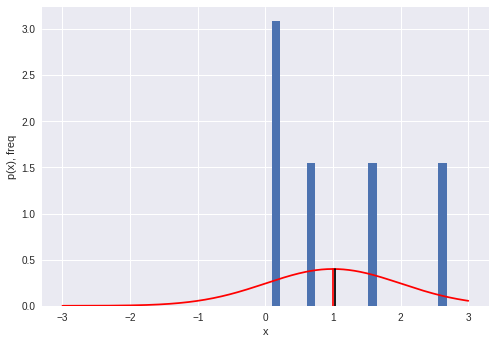

In [4]:
# 【実習】
#
# (1) パラメタ等を変えずに以下を5回繰り返し実行して、
#        毎回異なる結果が得られることを見てみましょう。
#
# (2) 標本数 N や生成シミュレーションの分散 sigma2 の値を変えて実行してみましょう。

mu = 1.0           # 未知の真値
sigma2 = 1.0    # 既知の真値

N = 5  # 標本数

x_samples = np.random.normal(mu,sigma2,N)

mu_ML = np.mean(x_samples)

def gauss_pdf(x,mu,sigma2):
    return (1/np.sqrt(2*np.pi*sigma2)) * np.exp( -(1/(2*sigma2)*(x-mu)*(x-mu)) )

# 真の分布の密度関数
x = np.linspace(-3,3,300)
y = gauss_pdf(x,mu,sigma2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(x_samples, bins=20, density=True)
ax.plot(x,y,'r-')

#赤色の縦線は真値、黒色の縦線は最尤推定値
ax.plot([mu,mu],[0,0.4],'r-')
ax.plot([mu_ML,mu_ML],[0,0.4],'k-')
plt.xlabel('x')
plt.ylabel('p(x), freq')


## ベイズ推定

未知パラメタ $\mu$ の事前分布を以下の正規分布とする。

$$ p_0(\mu) = \mathcal{N}(\mu| \mu_0, \sigma_{\mu 0}^2 ) $$

ここで $\mu_0$ は事前分布の中心、$\sigma_{\mu 0}^2$は事前分布の分散である。

「データを見る前に $\mu$ の値について情報を持っていないこと」を事前分布によって表現するために $\mu_0=0, \sigma_{\mu 0}^2=100$ とします。


このとき、$\mu$ の事後分布も正規分布

$$p(\mu|X) = \mathcal{N}(\mu | \hat{\mu}, \hat{\sigma}^2)$$

となり、

事後分布を表すハイパーパラメタの値は

$$ \hat{\mu} = \frac{s_0 \mu_0 + s\sum_{i}x_i}{s_0 + Ns}, $$


$$\hat{\sigma}^2 = \frac{1}{s_0+Ns}$$
となる。

ここで
$s= 1/\sigma^2$ は観測モデルの精度、
$s_0 = 1/\sigma_{\mu 0}^2$ は事前分布の精度、$\hat{s}=1/\hat{\sigma}^2$は事後分布の精度である。
「精度」とは一般に分散の逆数のことをいう。

Text(0, 0.5, 'p(x), freq')

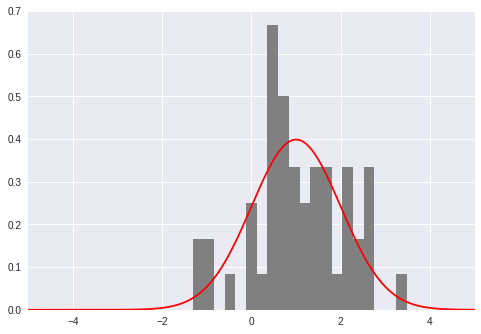

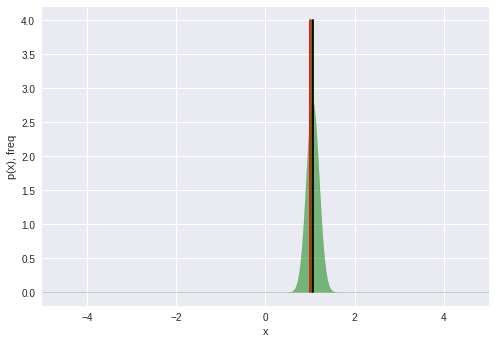

In [9]:
# 正規分布中心 mu のベイズ推定を、標本数 N を変えながら行います。
# 【実習】
# (1) 以下をパラメタを変えずに5回ほど繰り返し実行してみましょう。
# (2) 標本数 N を変えながらやり直してみましょう


# 真値
mu = 1.0
sigma2 = 1.0
N = 50  # 標本数

x_samples = np.random.normal(mu,sigma2,N)   #標本
mu_ML = np.mean(x_samples)  #最尤推定

# 事前確率のハイパーパラメタ定義
mu0 = 0
sigma_mu0_2 = 10
s0 = 1/sigma_mu0_2

# 事後確率を推定　＝　事後確率のハイパーパラメタ推定
s = 1/sigma2
s_hat = s0 + N*s
mu_hat = ( s0*mu0 + s*N*mu_ML )/s_hat


# 真の分布の密度関数
x = np.linspace(-5,5,300)
y = gauss_pdf(x,mu,sigma2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x_samples, bins=20, density=True, color='gray')
ax.plot(x,y,'r-')
plt.xlim([-5,5])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#緑色の領域は事後分布
ypost = gauss_pdf(x,mu_hat,1/s_hat)
ax.fill_between(x,ypost,ypost*0,color='green',alpha=0.5)
ax.plot([mu_hat,mu_hat],[0,4],'g-')
plt.xlim([-5,5])

#赤色の縦線は真値、黒色の縦線は最尤推定値
ax.plot([mu,mu],[0,4],'r-')
ax.plot([mu_ML,mu_ML],[0,4],'k-')


plt.xlabel('x')
plt.ylabel('p(x), freq')



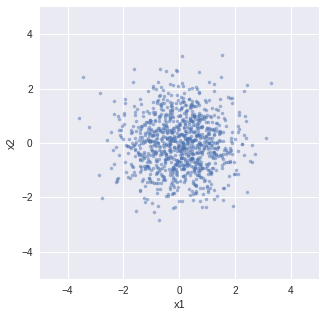

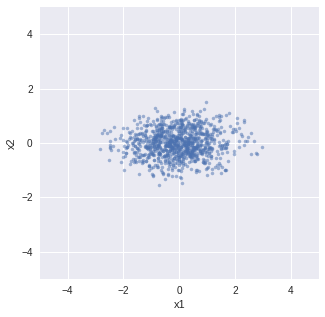

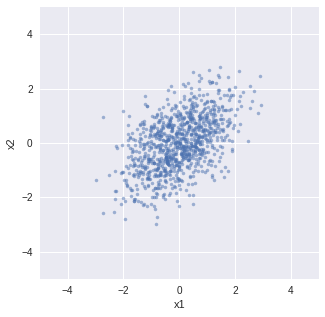

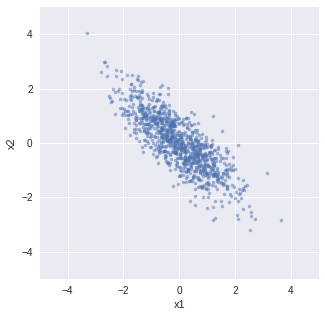

In [0]:
# ※以下は上記の演習と関係ありません
# 異なる共分散行列を持つ２次元正規分布サンプルの散布図

def gplot(C):
  mu = np.array([0,0])
  x = np.random.multivariate_normal(mu,C,1000)
  plt.figure(figsize=(5,5))
  plt.plot(x[:,0],x[:,1],'.',alpha=0.5)
  plt.xlim((-5,5))
  plt.ylim((-5,5))
  plt.xlabel('x1')
  plt.ylabel('x2')

C = np.array( [[1,0],[0,1]])
gplot(C)

C = np.array( [[1,0],[0,1/4]])
gplot(C)

C = np.array( [[1,0.5],[0.5,1]])
gplot(C)

C = np.array( [[1,-0.8],[-0.8,1]])
gplot(C)
